##Primera


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Dense
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_image, train_label),(test_image, test_label) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
num_images_train = train_image.shape[0]
num_images_test = test_image.shape[0]
image_width = train_image.shape[1]
image_height = train_image.shape[2]
num_channels = 1

In [4]:
train_image = train_image.astype('float32')/255
test_image = test_image.astype('float32')/255

In [5]:
train_image = train_image.reshape(num_images_train,image_width, image_height, num_channels).astype('float32') /255
test_image = test_image.reshape(num_images_test,image_width, image_height, num_channels).astype('float32') /255

In [6]:
train_label = tf.keras.utils.to_categorical(train_label,10)
test_label = tf.keras.utils.to_categorical(test_label,10)

In [7]:
#Modelo



model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, num_channels)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # One-hot encode the labels


    # Use one-hot encoded labels in model.fit
model.fit(train_image, train_label, batch_size=64, epochs=10, validation_data=(test_image, test_label))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0978 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0933 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0962 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0

In [8]:
model.evaluate(test_image,test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0978 - loss: 2.3025


[2.3026175498962402, 0.10000000149011612]

##Manejo de imagenes


In [9]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img, img_to_array

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [10]:
(train_data, train_label),(test_data, test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
num_data_train = train_data.shape[0]
train_width = train_data.shape[1]
train_height = train_data.shape[2]
num_channel = train_data.shape[3]
num_data_test = test_data.shape[0]
num_classess = len(np.unique(test_label))
print("Tamaño de las imagenes:", num_data_train, "width:",train_width, "height:", train_height, "Num channels:", num_channel, "tamaño de las imagenes de testeo:", num_data_test, num_classess)

Tamaño de las imagenes: 50000 width: 32 height: 32 Num channels: 3 tamaño de las imagenes de testeo: 10000 10


In [12]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [13]:
num_classess

10

In [14]:
train_label = to_categorical(train_label,10)
test_label = to_categorical(test_label, 10)

In [15]:
(train_data, valid_data) = train_data[5000:], train_data[:5000]
(train_label, valid_label) = train_label[5000:], train_label[:5000]

print(train_data.shape)
print(train_data.shape[0])
print(valid_data.shape[0])
print(test_data.shape[0])

(45000, 32, 32, 3)
45000
5000
10000


In [16]:
valid_data.shape, valid_label.shape, train_data.shape, train_label.shape

((5000, 32, 32, 3), (5000, 10), (45000, 32, 32, 3), (45000, 10))

In [17]:

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(1e-4), activation='relu', input_shape=(train_width, train_height, num_channel)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=100, kernel_size=4, padding='same', kernel_regularizer=regularizers.l2(1e-4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=4, padding='same', kernel_regularizer=regularizers.l2(1e-4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=4, padding='same', kernel_regularizer=regularizers.l2(1e-4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(10, activation='softmax'))
model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 100)         │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 100)         │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 32)            │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │          64,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 414,554 (1.58 MB)

 Trainable params: 413,906 (1.58 MB)

 Non-trainable params: 648 (2.53 KB)

In [18]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', brightness_range=[0.4,1.5])

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

#early = EarlyStopping(monitor='val_accuracy',patience=3)


Checkpoint = ModelCheckpoint(filepath="mejor_modelo.keras", verbose=1, monitor='val_accuracy', save_best_only=True)


hist = model.fit(datagen.flow(train_data, train_label, batch_size=128),

                 callbacks=[Checkpoint],
                 steps_per_epoch=len(train_data)//128,
                 epochs=50,
                 verbose=2,
                 validation_data=(valid_data, valid_label)
                 )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.12100, saving model to mejor_modelo.keras
351/351 - 59s - 168ms/step - accuracy: 0.1023 - loss: 2.3927 - val_accuracy: 0.1210 - val_loss: 2.3521
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.12100
351/351 - 0s - 1ms/step - accuracy: 0.1172 - loss: 2.3339 - val_accuracy: 0.1184 - val_loss: 2.3527
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.12100
351/351 - 42s - 121ms/step - accuracy: 0.1057 - loss: 2.3466 - val_accuracy: 0.1036 - val_loss: 2.3903
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.12100
351/351 - 0s - 1ms/step - accuracy: 0.0859 - loss: 2.3308 - val_accuracy: 0.1050 - val_loss: 2.3834
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.12100
351/351 - 41s - 117ms/step - accuracy: 0.1051 - loss: 2.3359 - val_accuracy: 0.0962 - val_loss: 2.3546
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.12100
351/351 - 0s - 1ms/step - accuracy: 0.1094 - loss: 2.3374 - val_accuracy: 0.0968 - val_loss: 2.3532
Epoch 7/50

Epoch 7: val_accuracy did not improve from 0.12100
351/351 - 41s - 117ms/step - accuracy: 0.1057 - loss: 2.3315 - val_accuracy: 0.1010 - val_loss: 2.3362
Epoch 8/50

Epoch 8: val

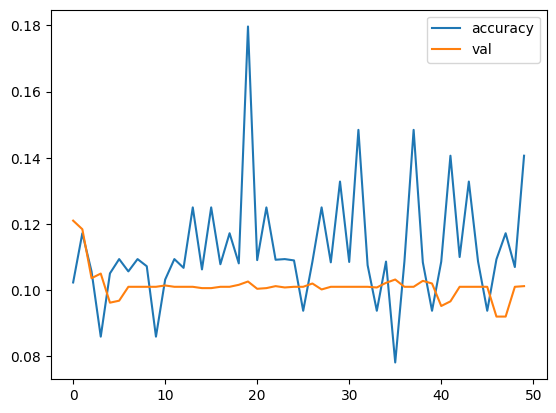

In [21]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()




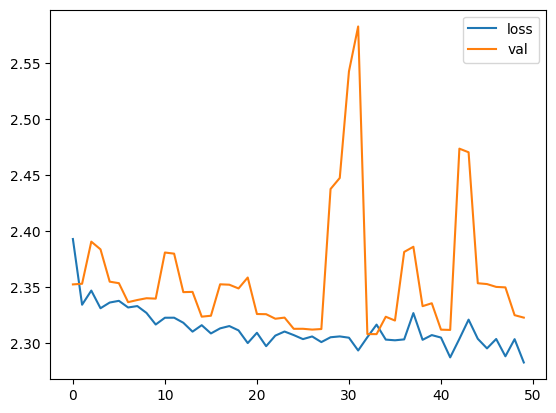

In [22]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()



In [23]:
model.evaluate(test_data, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1000 - loss: 2.3229


[2.3226451873779297, 0.09989999979734421]

In [25]:
model2 = model  # Assuming you want to create a copy of the model
model2.load_weights('/content/mejor_modelo.keras')


In [26]:
model2.evaluate(test_data, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1205 - loss: 2.3524


[2.3526463508605957, 0.12380000203847885]